In [ ]:
# try convert pdf to image

from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
images = convert_from_path('test.pdf')
images[0].save("test1.png")

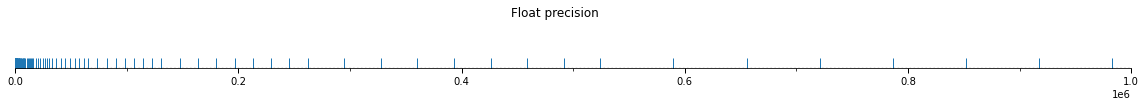

In [83]:
# python convert number to raw binary bits, and do some bit operation

import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy
import struct
a = numpy.float32(2)

def binaryPrint(x):
    print("{0:b}".format(x))
    
def floatToBits(a):
    x = struct.pack("<f", a)
    return struct.unpack("<I", x)[0]

def bitsToFloat(a):
    x = struct.pack("<I", a)
    return struct.unpack("<f", x)[0]

def assambleFloat32(sign, exp, mantissa):
    signPart = sign << 31
    expPart = exp << 23
    mantissaPart = mantissa
    
    bits = numpy.uint32(signPart | expPart | mantissaPart)
    # binaryPrint(signPart)
    # binaryPrint(expPart)
    # binaryPrint(mantissaPart)
    # binaryPrint(bits)
    return bitsToFloat(bits)

# matplotlib

marker_style = dict(linestyle=':', color='0.8', markersize=20,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")

def setup(ax, markerX, markerY):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(200000))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100000))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 1000000)
    ax.set_ylim(0, 100)

    ax.plot(markerX, markerY, 0, marker='|', **marker_style)

fig0, axs0 = plt.subplots(1, 1, figsize=(20, 1))
fig0.suptitle('Float precision')

deltaBits = 0x1
deltaMantissa = 0x1 << 20
x = []
exp = 0
while(exp < 255):
    mantissa = 0
    while(mantissa < 2**23):
        x.append(assambleFloat32(0, exp, mantissa))
        mantissa += deltaMantissa
    exp += deltaBits
y = [0] * len(x)
setup(axs0, x, y)
#x[len(x) - 100:]